## Import Libraries and set up input and output paths

In [51]:
# First import all necessary libraries to run the script
import sys
sys.path.append("..") # so we can import espresso from the directory above.
import os
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import dabest 
import espresso as esp
print('Espresso Version' + esp.__version__)


# Tell it where the files are, we are expecting at least one FeedLog and one Metadata file
mainDataPath='/Users/xusy/Data/Espresso/Schlichting R58E02/MS68'

# Make a folder for the pictures you are about to dump, if, after checking, there is no existing "images" folder
imagepath=mainDataPath+'/' 'images/'
mainDataPathList=os.listdir(mainDataPath)
if [s for s in mainDataPathList if 'images' in s]==[]:
    os.mkdir(imagepath)
dataFolders = [s for s in mainDataPathList if "20" in s]








Espresso Version0.7.3


In [52]:
# Read all the data from the folder with espresso analysis code "espresso" and store as a dataframe called "all_Data"
all_Data=esp.espresso(mainDataPath, expt_duration_minutes=120)
# Preview the dataframe to see if it's about right
all_Data



3 feedlogs with a total of 89 flies.

3 Genotypes [w1118; R58E02Cas, w1118; MS68, R58E02Cas>MS68]
Categories (3, object): [w1118; MS68 < w1118; R58E02Cas < R58E02Cas>MS68].

2 Status types [Sibling, Offspring]
Categories (2, object): [Sibling < Offspring].

1 Temperature [25]
Categories (1, int64): [25].

1 FoodChoice [5% sucrose + 5% yeast extract]
Categories (1, object): [5% sucrose + 5% yeast extract].

2 Sex types [F, M]
Categories (2, object): [F < M].

1 type of FlyCountInChamber [3]
Categories (1, int64): [3].

Total experiment duration = 120 minutes

ESPRESSO v0.7.3

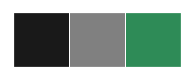

In [53]:
# Set up a custom palette for plots
CPalette = esp.create_palette(['k', 'gray', 'seagreen'], # green for test, use this for ACR expriments
                                all_Data.feeds.Genotype.cat.categories
                                )

# CPalette = esp.create_palette(['black', 'gray', 'orangered'], # red for test, use this for CsCh expriments
#                                 all_Data.feeds.Genotype.cat.categories
#                                 )

# Preview the custom palette
sns.palplot(CPalette.values())




In [54]:
## Contrast plots

/Users/xusy/Data/Espresso/Schlichting R58E02/MS68/images/


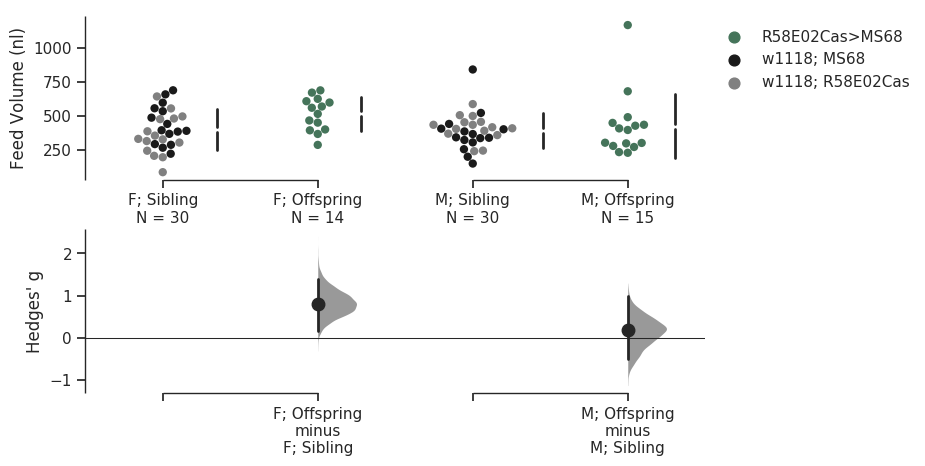

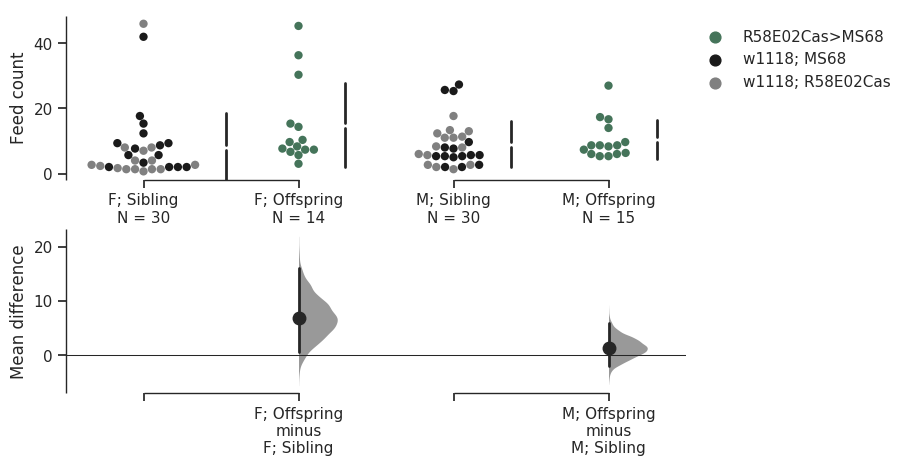

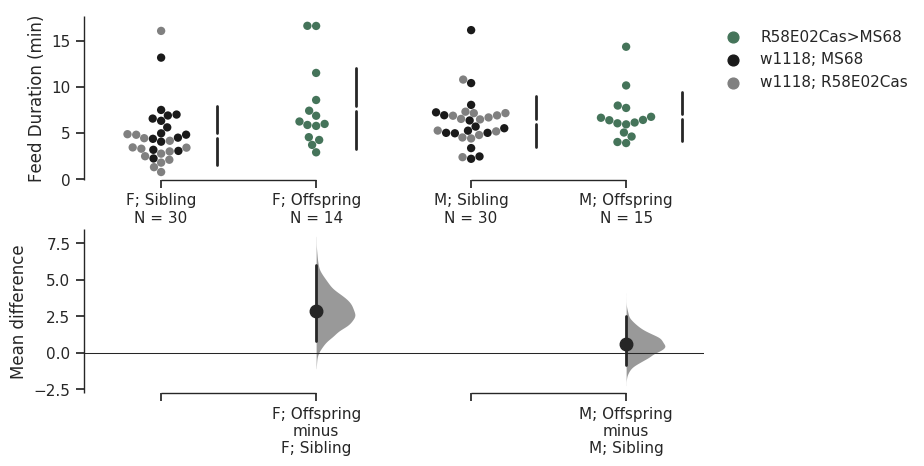

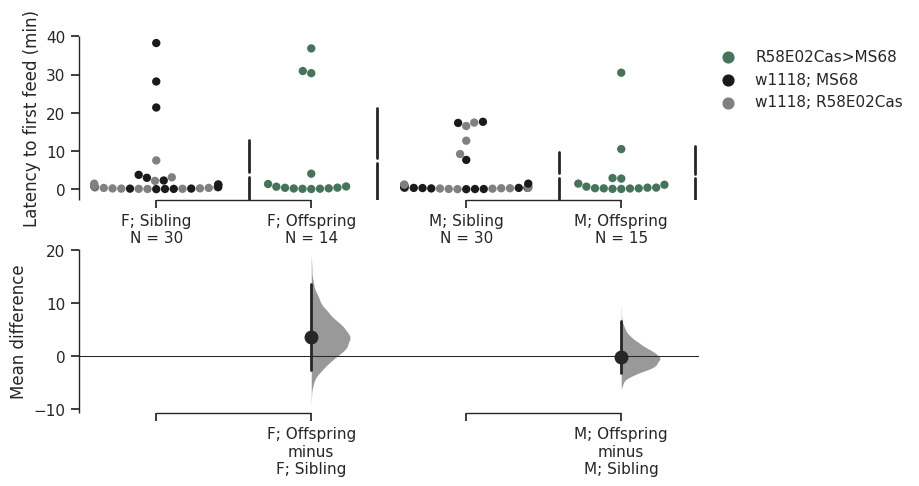

In [59]:
# put in the parameters you don't want to type over and over again when using the plot function
groupby='Sex'
compareby='Status'
colorby='Genotype'
timeToAnalyse=24.5 #hours
figAspectRatio=(8, 5)
fDPI=150


# plot volume plots with espresso contrast plot function
# load data into dabest
volume = all_Data.plot.contrast.feed_volume_per_fly(group_by=groupby, 
                                                       compare_by=compareby,start_hour=0,
                                                    volume_unit="nanoliter",
                                                     end_hour=timeToAnalyse)
# plot data with dabest
fvolume = volume.hedges_g.plot(color_col=colorby,swarm_label="Feed Volume (nl)",
                                custom_palette=CPalette, 
                                    fig_size=figAspectRatio)

# save both a .png for quick browsing and a .svg for manipulation
fvolume.savefig(imagepath + 'Volume' +'.png',transparent=True, bbox_inches='tight', dpi=fDPI)
fvolume.savefig(imagepath + 'Volume' +'.svg',transparent=True, bbox_inches='tight')


count = all_Data.plot.contrast.feed_count_per_fly(group_by=groupby, 
                                                       compare_by=compareby,start_hour=0,
                                                     end_hour=timeToAnalyse)

fcount = count.mean_diff.plot(color_col=colorby, fig_size=figAspectRatio,swarm_label="Feed count",
                                custom_palette=CPalette)
fcount.savefig(imagepath + 'Count.png',transparent=True, bbox_inches='tight', dpi=fDPI)
fcount.savefig(imagepath + 'Count.svg',transparent=True, bbox_inches='tight')



duration = all_Data.plot.contrast.feed_duration_per_fly(group_by=groupby, 
                                                       compare_by=compareby,start_hour=0,
                                                     end_hour=timeToAnalyse)

fduration = duration.mean_diff.plot(color_col=colorby,
                                custom_palette=CPalette, swarm_label="Feed Duration (min)", 
                                    fig_size=figAspectRatio)
fduration.savefig(imagepath + 'Duration.png',transparent=True, bbox_inches='tight', dpi=fDPI)
fduration.savefig(imagepath + 'Duration.svg',transparent=True, bbox_inches='tight')

latency = all_Data.plot.contrast.latency_to_feed(group_by=groupby, 
                                                       compare_by=compareby,start_hour=0,
                                                     end_hour=timeToAnalyse)

flatency = latency.mean_diff.plot(color_col=colorby,
                                custom_palette=CPalette, swarm_label="Latency to first feed (min)", 
                                    fig_size=figAspectRatio)
flatency.savefig(imagepath + 'Latency.png',transparent=True, bbox_inches='tight', dpi=fDPI)
flatency.savefig(imagepath + 'Latency.svg',transparent=True, bbox_inches='tight')

# remind yourself where the pictures are
print(imagepath)








###### Cumulative plots

Munging....
Plotting....

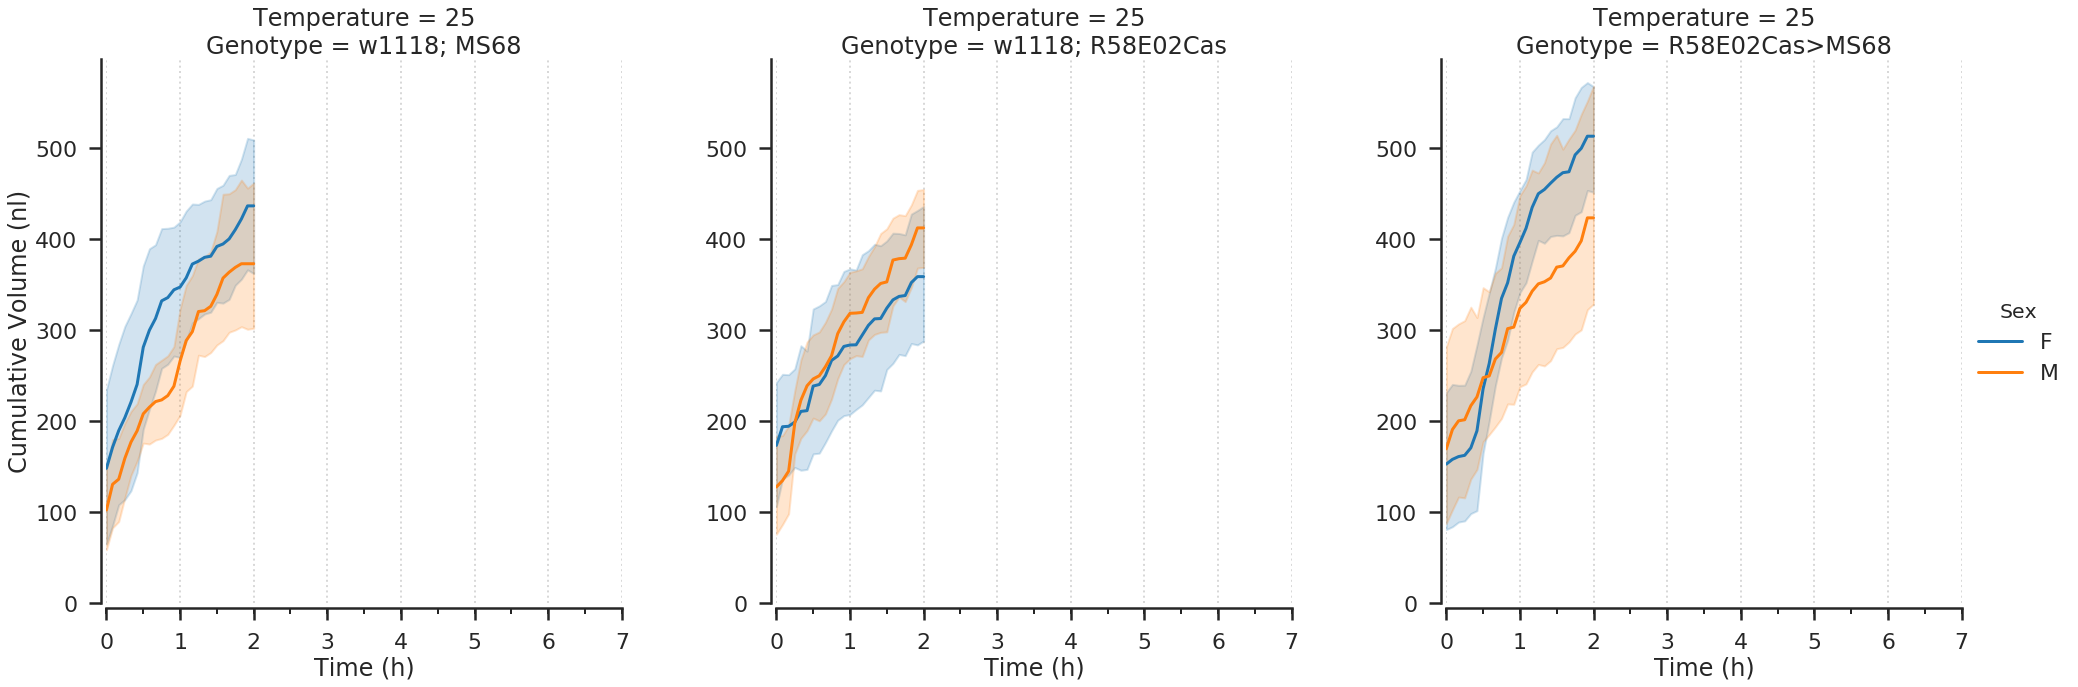

In [58]:
cConsumption=all_Data.plot.cumulative.consumption(color_by='Sex',
                                         col='Genotype',
                                         row='Temperature', end_hour=7)




cConsumption.savefig(imagepath + 'CumulativeVolume' +'.png',transparent=True, bbox_inches='tight', dpi=150)
cConsumption.savefig(imagepath + 'CumulativeVolume' +'.svg',transparent=True, bbox_inches='tight')


### Cumulative Plots